## Introduction

* In previous experiment https://github.com/zihao12/pyJSMF-RAW/blob/master/experiments/smallsim_experiment1.ipynb, the acnhor-word algorithm gets good estimate despite relying on the wrong anchor words. 

* Below we can see the rows in C corresponding to the true anchor-words and the wrong anchor-words are very similar. But I don't know why they are similar (these words have quite different distributions if we only look at count matrix $X$, or $X$ scaled by row sum). 

In [1]:
import os
import sys
import pandas as pd
from scipy import sparse

import numpy as np
import matplotlib.pyplot as plt

script_dir = "../"
sys.path.append(os.path.abspath(script_dir))
from file2 import *
from factorize import *
from smallsim_functions import *
from misc import *


np.random.seed(123)

In [2]:
n = 1000
p = 5000
k = 4
doc_len = 100

sim = smallsim_independent(n = n, p = p, k = k, doc_len = doc_len)
X = sparse.coo_matrix(sim["X"])
L = sim["L"]
F = sim["F"]
id_m = sim["id_m"]
Chat, D1, D2 = X2C(X)

X = X.toarray()

Chat.shape

[file.bows2C] Start constructing dense C...
- Counting the co-occurrence for each document...
+ Finish constructing C and D!
  - The sum of all entries = 1.000000
  - Elapsed Time = 0.7933 seconds


(4998, 4998)

In [3]:
Chat,_,_ = rectifyC(Chat, k, rectifier="AP")

+ Start alternating projection
  - 1-th iteration... (3.117024e-04 / 4.857925e-08)
  - 2-th iteration... (1.482565e-07 / 4.857929e-08)
  - 3-th iteration... (1.061586e-07 / 4.857932e-08)
  - 4-th iteration... (8.022487e-08 / 4.857936e-08)
  - 5-th iteration... (6.212581e-08 / 4.857939e-08)
  - 6-th iteration... (4.910836e-08 / 4.857942e-08)
  - 7-th iteration... (3.967035e-08 / 4.857945e-08)
  - 8-th iteration... (3.278401e-08 / 4.857947e-08)
  - 9-th iteration... (2.772217e-08 / 4.857949e-08)
  - 10-th iteration... (2.386173e-08 / 4.857950e-08)
  - 11-th iteration... (2.090256e-08 / 4.857952e-08)
  - 12-th iteration... (1.862261e-08 / 4.857953e-08)
  - 13-th iteration... (1.682069e-08 / 4.857954e-08)
  - 14-th iteration... (1.537568e-08 / 4.857955e-08)
  - 15-th iteration... (1.418457e-08 / 4.857956e-08)
+ Finish alternating projection
  - Elapsed seconds = 22.9625



In [4]:
Ctrue = F @ L.T
Ctrue = Ctrue @ Ctrue.T
Ctrue = Ctrue/Ctrue.sum()

In [5]:
Chat_rs = Chat.sum(axis = 1)
Ctrue_rs = Ctrue.sum(axis = 1)

Chat_bar = Chat/Chat_rs[:,None]
Ctrue_bar = Ctrue/Ctrue_rs[:,None]

In [6]:
S, diagR, _ = findS(Chat_bar, k)
S0, diagR0, _ = findS(Ctrue_bar, k)

[inference.findS] Start finding the set of anchor bases S...
+ Finish finding set S!
  - Discovered 4 basis vectors by [sparsePartial] method.
  - Elapsed time = 0.5615 seconds

[inference.findS] Start finding the set of anchor bases S...
+ Finish finding set S!
  - Discovered 4 basis vectors by [sparsePartial] method.
  - Elapsed time = 0.5659 seconds



In [7]:
B, _, _ = recoverB(Chat_bar, Chat_rs, S, "activeSet")
B0, _, _ = recoverB(Ctrue_bar, Chat_rs, S0, "activeSet")

[inference.recoverB] Start recovering the object-cluster B...
  - 0-th member...
  - 500-th member...
  - 1000-th member...
  - 1500-th member...
  - 2000-th member...
  - 2500-th member...
  - 3000-th member...
  - 3500-th member...
  - 4000-th member...
  - 4500-th member...
+ Finish recovering B matrix using [activeSet]
  - 4/4998 objects are converged.
  - loss = 4.2114 (By Frobenius norm).
  - Elapsed time = 6.1734 seconds.

[inference.recoverB] Start recovering the object-cluster B...
  - 0-th member...
  - 500-th member...
  - 1000-th member...
  - 1500-th member...
  - 2000-th member...
  - 2500-th member...
  - 3000-th member...
  - 3500-th member...
  - 4000-th member...
  - 4500-th member...
+ Finish recovering B matrix using [activeSet]
  - 4/4998 objects are converged.
  - loss = 3.9480 (By Frobenius norm).
  - Elapsed time = 6.1280 seconds.



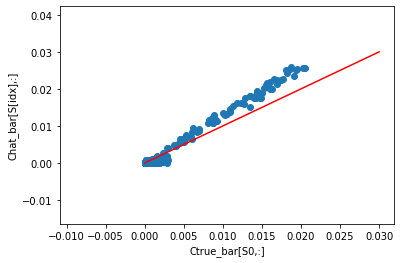

In [8]:
idx = match_topics(B0, B).astype(int)

x = Ctrue_bar[S0,:]
y = Chat_bar[S[idx],:]
plt.scatter(x, y)
plt.plot([0, 0.03],[0,0.03], color = "red")
plt.xlabel("Ctrue_bar[S0,:]")
plt.ylabel("Chat_bar[S[idx],:]")
plt.show()

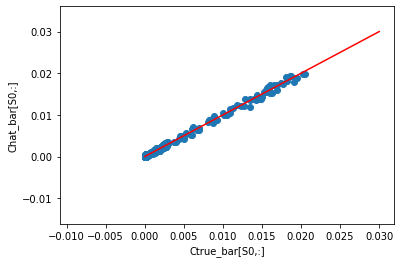

In [9]:
x = Ctrue_bar[S0,:]
y = Chat_bar[S0,:]
plt.scatter(x, y)
plt.plot([0, 0.03],[0,0.03], color = "red")
plt.xlabel("Ctrue_bar[S0,:]")
plt.ylabel("Chat_bar[S0,:]")
plt.show()

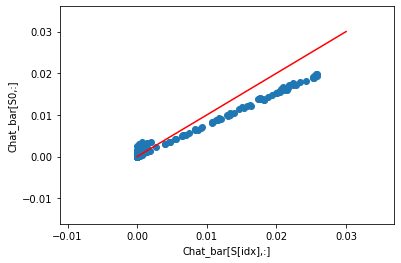

In [10]:
x = Chat_bar[S[idx],:]
y = Chat_bar[S0,:]
plt.scatter(x, y)
plt.plot([0, 0.03],[0,0.03], color = "red")
plt.xlabel("Chat_bar[S[idx],:]")
plt.ylabel("Chat_bar[S0,:]")
plt.show()

In [11]:
F[S[idx],:].round(4)

array([[0.0002, 0.    , 0.    , 0.    ],
       [0.    , 0.0002, 0.    , 0.    ],
       [0.0002, 0.    , 0.    , 0.    ],
       [0.    , 0.0001, 0.    , 0.0001]])

In [12]:
F[S0,:].round(4)

array([[0.    , 0.    , 0.0197, 0.0002],
       [0.    , 0.0083, 0.    , 0.    ],
       [0.0188, 0.    , 0.    , 0.0001],
       [0.0001, 0.    , 0.0003, 0.0279]])

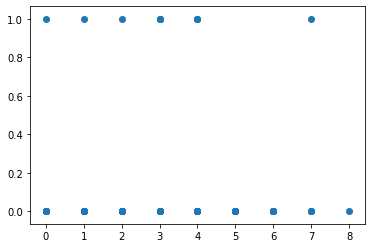

In [13]:
plt.scatter(X[:, S0].flatten(), X[:, S[idx]].flatten())

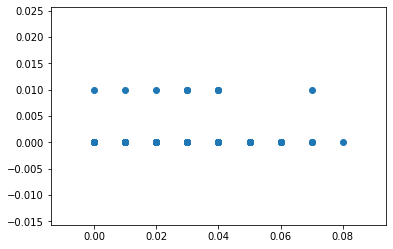

In [14]:
Xbar = X/X.sum(axis = 1)[:, None]
plt.scatter(Xbar[:, S0].flatten(), Xbar[:, S[idx]].flatten())

In [15]:
Ctrue[np.ix_(S0, S[idx])]

array([[1.37966438e-07, 1.21018377e-07, 1.72094657e-07, 1.59189930e-07],
       [8.02424732e-08, 2.55942686e-07, 1.07355507e-07, 1.16012977e-07],
       [7.26057035e-07, 1.58765230e-07, 5.83753480e-07, 1.30398822e-07],
       [1.87039783e-07, 2.53816120e-07, 3.05985829e-07, 5.58728967e-07]])